<h1 style="text-align:center">Homework 7</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations &mdash; Spring 2016</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

In [1]:
import numpy as np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

## Problem 4.28

In [4]:
# Define the matrices
I1 = 10.0
I2 = 30.0

k1 = 800000 
k2 = 1200000
k3 = 500000

M = np.asarray([[I1, 0],
                [0,  I2]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2 + k3]])

In [5]:
# We'll use the scipy version of the linear algebra
from scipy import linalg

eigenvals, eigenvects = linalg.eigh(K, M)


The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. The eigenvalues are the square of the two natural frequencies. The eigenvectors are returned in normalized form, with each "column" of the array representing an eigenvector.


In [6]:
print('\n')
print('The resulting eigenalues are {:.2f} and {:.2f}.'.format(eigenvals[0], eigenvals[1]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1])))
print('\n')



The resulting eigenalues are 28653.29 and 228013.38.


So the two natrual frequencies are 169.27rad/s and 477.51rad/s.




In [9]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')



The first eigenvector is [-0.119 -0.169].


The second eigenvector is [-0.293  0.068].




array([ 1.   , -0.233])

## Problem 4.29
We'll loop through the presribed range for $I_2$ determining the eigenvalues and eigenvectors along the way. Then, we'll plot them.

In [23]:
I2_range = np.linspace(0.01, 60, 601) # Create the range for I2, 0+ - 60 with 601 data points

eigval_range = np.zeros((601, 2)) # Create an array to fill with teh calculated eigenvalues

# create arrays to fill with the two eigenvectors
eigvect1_range = np.zeros((2, 601))
eigvect2_range = np.zeros((2, 601))

for index, I2 in enumerate(I2_range):
    M = np.asarray([[I1, 0],
                [0,  I2]])
    
    # K doens't change from the original definition, so we don't need to include here
    # So, I've commented it out.
    # It's still included as a comment for reference
    #  K = np.asarray([[k1 + k2, -k2],
    #                 [-k2,      k2 + k3]])
    
    # Solve for the eigenvalues and eigenvectors for the current I2 value
    eigenvals, eigenvects = linalg.eigh(K, M)
    
    # reshape the returned eigenvalues for storage in the array
    eigval_range[index, :] = eigenvals.reshape(1,2)
    
    # Now, fill the corret places on the eigenvalue arrays
    eigvect1_range[:, index] = eigenvects[:, 0]
    eigvect2_range[:, index] = eigenvects[:, 1]

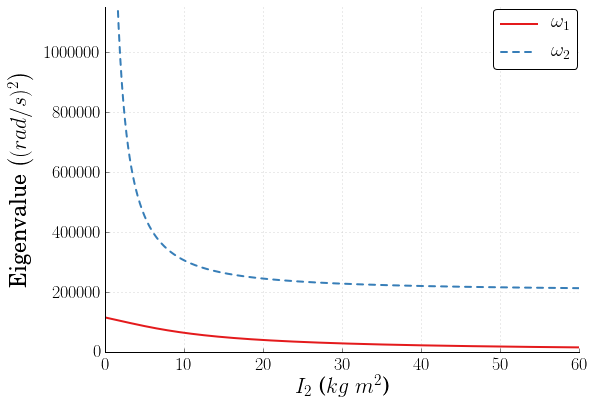

In [39]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel(r'$I_2$ ($kg \ m^2$)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Eigenvalue $\left( (rad/s)^2 \right)$', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(I2_range, eigval_range[:, 0], linewidth=2, linestyle='-', label=r'$\omega_1$')
plt.plot(I2_range, eigval_range[:, 1], linewidth=2, linestyle='--', label=r'$\omega_2$')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
plt.ylim(0, 10 * np.max(eigval_range[:,0]))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Prob4p29_eigenvals.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

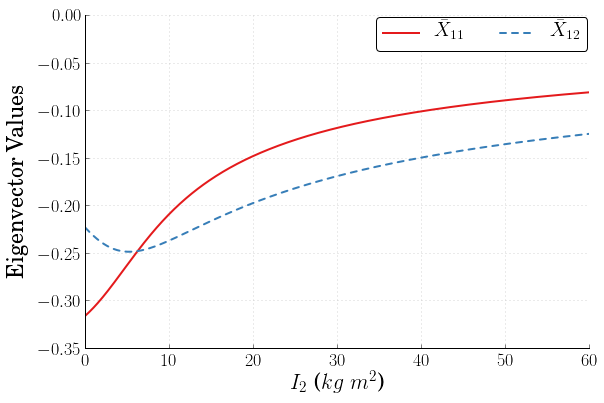

In [52]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel(r'$I_2$ ($kg \ m^2$)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Eigenvector Values', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(I2_range, eigvect1_range[0, :], linewidth=2, linestyle='-', label=r'$\bar{X}_{11}$')
plt.plot(I2_range, eigvect1_range[1, :], linewidth=2, linestyle='--', label=r'$\bar{X}_{12}$')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
plt.ylim(-0.35, 0.0)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Prob4p29_eigenvect1.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

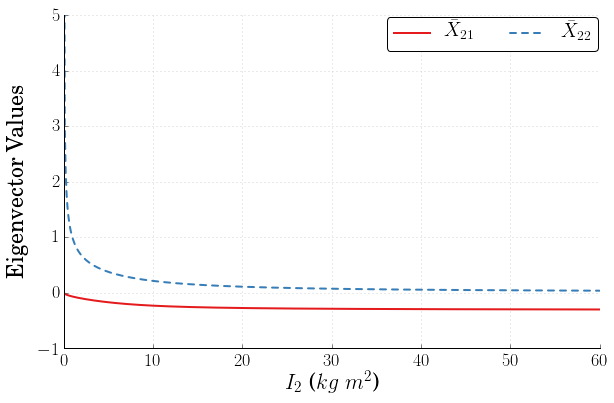

In [53]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel(r'$I_2$ ($kg \ m^2$)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Eigenvector Values', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(I2_range, eigvect2_range[0, :], linewidth=2, linestyle='-', label=r'$\bar{X}_{21}$')
plt.plot(I2_range, eigvect2_range[1, :], linewidth=2, linestyle='--', label=r'$\bar{X}_{22}$')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
plt.ylim(-1, 5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Prob4p29_eigenvect2.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Problem 4.40

In [75]:
# Define the matrices
m1 = 0.1  # kg
m2 = 0.2  # kg
m3 = 0.1  # kg

k1 = 1000 # N/m
k2 = 2000 # N/m
k3 = 1000 # N/m

M = np.asarray([[m1,  0,   0],
                [m2, m2,   0],
                [m3, m3,  m3]])

K = np.asarray([[k1, -k2,   0],
                [0,   k2, -k3],
                [0,    0,  k3]])

In [84]:
eigenvals, eigenvects = linalg.eig(K, M)

We needed to call ```eig``` not the usual, faster ```eigh``` due to the nature of the matrices in this problem. The funciton ```eigh``` returns real eigenvalues, whereas ```eig``` is not guaranteed to. So, we need to check the realness of the returned eigenvalues and get the appropriate components.

In [88]:
# After checking (manually) that the returned values had not imaginary compoenent, 
# we can just take the absolute value of the array. This takes the absolute
# value of each component.
eigenvals = np.abs(eigenvals)

In [86]:
print('\n')
print('The resulting eigenalues are {:.2f}, {:.2f}, and {:.2f}.'.format(eigenvals[0], eigenvals[1], eigenvals[2]))
print('\n')
print('So the natrual frequencies are {:.2f}rad/s, {:.2f}rad/s, and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1]), np.sqrt(eigenvals[2])))
print('\n')



The resulting eigenalues are 38984.82, 1805.13, and 14210.05.


So the natrual frequencies are 197.45rad/s, 42.49rad/s, and 119.21rad/s.




In [87]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')
print('The third eigenvector is ' + str(eigenvects[:,2]) + '.')
print('\n')



The first eigenvector is [-0.537  0.779 -0.325].


The second eigenvector is [-0.889 -0.364 -0.276].


The third eigenvector is [-0.35   0.074  0.934].




<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.



In [14]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())